In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns

In [5]:
import scipy.optimize as so
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import IFrame, display, HTML, Markdown
import random
import math
import seaborn as sns


def prettyfie(ax, x, y, title, legendYN='Yes'):

    # Remove borders
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(alpha=0.25)

    # Remove unnecessary ticks
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        labelbottom=True,
        left=False,
        right=False,
        labelleft=True)

    if legendYN == 'Yes':
        # Create legend and grid
        ax.legend(framealpha=1, shadow=True)
        ax.legend()

    # Set labels and title
    ax.set_xlabel(x, fontsize=14)
    ax.set_ylabel(y, fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)


def printmd(string):
    display(Markdown(string))

In [ ]:
# plt.rcParams['figure.figsize'] = [15, 5]

# def plotpretify(ax, maxx, minx=0, miny=None, maxy=None,
#                 Grid=True, LB=True, LL=True):
#     ax.spines["top"].set_visible(False)
#     ax.spines["left"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.spines["bottom"].set_visible(False)

#     ax.tick_params(
#         axis="both",
#         which="both",
#         bottom=False,
#         top=False,
#         labelbottom=False,
#         left=False,
#         right=False,
#         labelleft=False)
# #     ax.grid(True)
    
#     ax.set_xlim(minx, maxx)
#     ax.set_ylim(miny, maxy)

# sns.set()

In [ ]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)  # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name, index=index)
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name, index=index, size=size)
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name, index=str(index or '?'))

### scheme: Exp

### Markovlength: 1

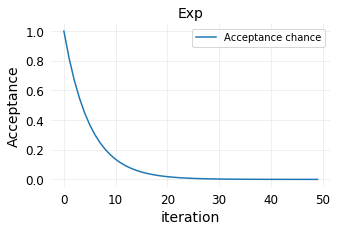

### Markovlength: 5

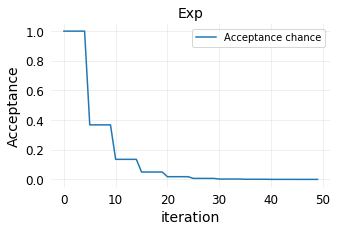

### Markovlength: 10

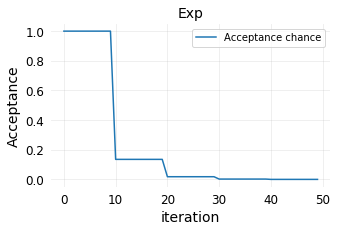

### scheme: Expvar

### Markovlength: 1

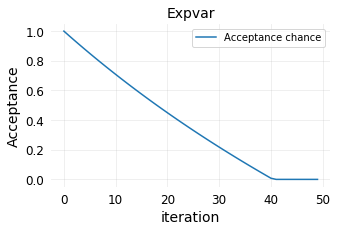

### Markovlength: 5

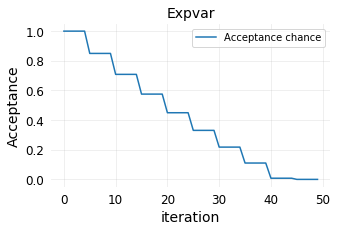

### Markovlength: 10

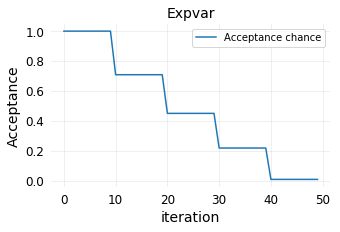

Scheme               Exp                              Expvar              \
MarkovLength          1           5           10          1           5    
11             59.957427   59.626907   61.629312   63.167904   63.019340   
12             71.789440   71.453480   72.184640   73.574757   76.174029   
13             88.015534   88.659044   86.900560   90.547733   91.287694   
14            102.510377  104.691185  105.030712  102.846019  106.664603   
15            121.126782  121.658498  122.689764  124.404882  126.691106   
16            138.711904  139.250948  140.368572  141.863898  142.332172   
17            159.022233  157.880593  161.461434  164.398094  163.960919   
18            182.561584  182.233180  182.437481  185.004959  183.708510   
19            204.397841  202.720980  199.232507  204.323590  206.020293   

Scheme                    
MarkovLength          10  
11             62.966484  
12             75.385928  
13             90.928766  
14            106.889896  
15            126.110122  
16            141.900593  
17            167.336391  
18            184.495648  
19            208.317929

In [47]:
def plot(coordList):
    plt.rcParams['figure.figsize'] = [10, 10]
    sns.set()
    sns.set_style("dark")
    fig = plt.figure()
    ax = plt.subplot(111)
    colors = list(range(len(coordList)))
    ax.scatter(coordList[:, 0], coordList[:, 1], c=colors, cmap='Dark2')
    circle1 = plt.Circle((0, 0), radius, alpha=0.2, color="olive")
    ax.add_artist(circle1)
    plotpretify(
        ax,
        1.1,
        minx=-1.1,
        miny=-1.1,
        maxy=1.1,
        Grid=False,
        LL=False,
        LB=False)


def getScheme_data(iters, plot="No", scheme="Sigmoid", markovChain=1):

    answer = []

    if scheme == "Sigmoid":
        linspace = np.linspace(0, 7, iters)
        for x in linspace:
            answer.append(0.5 +
                          math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)
    elif scheme == "Exp":
        for x in range(iters):
            answer.append(np.exp(-x / (iters / 10)))
    elif scheme == "Expvar":
        for x in range(iters):
            answer.append(
                max(
                    np.exp(-x / iters) - ((1.5 * x) / iters) * (1 / math.e),
                    0))
    elif scheme == "Expvar2":
        for x in range(iters):
            answer.append(max(np.exp(-x / iters) - 1.1 * (1 / math.e), 0))
    elif scheme == "Hillclimb":
        for x in range(iters):
            answer.append(0)
    elif scheme == "Binary":
        for x in range(iters):
            if x < iters / 2:
                answer.append(1)
            else:
                answer.append(0)
    elif scheme == "Linear":
        for x in range(iters):
            answer.append(1 - (x / iters))

    if plot == "Yes":
        plotanswer = np.repeat(answer, markovChain)
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))
        ax.plot(plotanswer, label="Acceptance chance")
        ax.legend()
        prettyfie(ax, "iteration", "Acceptance", scheme, legendYN="Yes")
        plt.show()
    return np.array(answer)


def incircle(crds, r=1):
    return np.power(crds[0], 2) + np.power(crds[1], 2) < r


def spawn(r=1):
    x = random.uniform(-r, r)
    limits = [-np.sqrt(r**2 - x**2), np.sqrt(r**2 - x**2)]
    y = random.uniform(limits[0], limits[1])
    return [x, y]


# Good score when somewhere < 2
def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(i, len(coord)):
            if i != j:
                totalDist += 1 / abs(
                    math.hypot(coord[j][0] - coord[i][0],
                               coord[j][1] - coord[i][1]))
    return totalDist


def move(k, coord, temp, rate):
    F = np.array([0.0, 0.0])
    velocity = np.zeros(2, float)
    for l in coord:
        if any(l != k):
            r = np.array(k) - np.array(l)
            F1 = (r / (np.linalg.norm(r)**3) * rate)
            F += F1
    newPoint = k + F
    xr = random.uniform(-1, 1) * (1 / 50)
    yr = random.uniform(-1, 1) * (1 / 50)
    newPoint += [xr, yr]
    if not incircle(newPoint, radius):
        newPoint = newPoint / la.norm(newPoint)
    return newPoint, F


def submove(k, i, coord, temp, rate, score):
    global coordListList
    cT, favo = move(k, coord, temp, rate)
    coordTemp = np.copy(coord)
    coordTemp[i] = cT
    coordListList.append(coordTemp)
    scoreTemp = checkScore(coordTemp)
    if temp > 0:
        chance = np.exp(-(scoreTemp - score) / temp)
    else:
        chance = 0
    if score > scoreTemp:
        return np.array(coordTemp), favo
    elif chance > random.random():
        return np.array(coordTemp), favo
    else:
        return coord, favo


def changeCoordSingle(coord, temp, rate):
    score = checkScore(coord)
    fav = []
    for i, k in enumerate(coord):
        coord, favo = submove(k, i, coord, temp, rate, score)
        fav.append(favo)
    return coord


def changeCoordAll(coord, temp, rate):
    coordTemp = []
    score = checkScore(coord)
    fav = []
    for i, k in enumerate(coord):
        cT, favo = move(k, coord, temp, rate)
        coordTemp.append(cT)
        fav.append(favo)
    scoreTemp = checkScore(coordTemp)
    if temp > 0:
        chance = np.exp(-(scoreTemp - score) / temp)
    else:
        chance = 0
    if score > scoreTemp:
        return np.array(coordTemp)
    elif chance > random.random():
        return np.array(coordTemp)
    else:
        return changeCoordAll(coord, temp, rate)


def start_sim(coordList,
              radius,
              pointsNum,
              iterations,
              rate,
              scheme,
              markovChain,
              moveScheme,
              plotScheme="No"):
#     global coordListList
    schemeData = np.repeat(
        getScheme_data(
            math.ceil(iterations / markovChain),
            plot=plotScheme,
            scheme=scheme), markovChain)

    #     coordListList = []
    #     coordListList.append(coordList)
    checklist = []
    for i in range(iterations):
        temp = schemeData[i]
        coordList = moveScheme(coordList, temp, rate)
        #         coordListList.append(coordList)
        checklist.append(checkScore(coordList))

    return checklist


coordListList = []

radius = 1
pointsNums = list(range(11, 20))
iterations = 50
rate = math.pow(10, -4)
schemes = ["Exp", "Expvar"]
# checks = []
# coordListListList = []
results = {}
mcl = [1, 5, 10]
moveScheme = changeCoordSingle

data = []
rowcount = 0
for i, scheme in enumerate(schemes):
    printmd(f"### scheme: {scheme}")
    for j, markovL in enumerate(mcl):
        data.append([])
        printmd(f"### Markovlength: {markovL}")
        getScheme_data(
            math.ceil(iterations / markovL),
            plot="Yes",
            scheme=scheme,
            markovChain=markovL)
        for pointsNum in log_progress(pointsNums, every=1, size=len(pointsNums), name='Items'):
            random.seed(147)
            coordList = []    
            for i in range(pointsNum):
                coordList.append(spawn(radius))
            coordList = np.array(coordList)
            #             printmd(f"## Number of points: {pointsNum}")
            checklist = start_sim(
                coordList,
                radius,
                pointsNum,
                iterations,
                rate,
                scheme,
                markovL,
                moveScheme,
                plotScheme="No")
            data[rowcount].append(checklist[-1])
        rowcount += 1

schemas = []
mcls = []
for i, scheme in enumerate(schemes):
    for ml in mcl:
        schemas.append(scheme)
        mcls.append(ml)
arrays = [schemas, mcls]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Scheme', 'MarkovLength'])
s = pd.DataFrame(data, index=index, columns=list(range(11, 11 + len(data[0]))))
s.T

In [80]:
meanRow = list(s.mean(axis=0))
p = s - s.mean()

display(HTML(p.T.to_html())
print(meanRow)
display(HTML(p.to_html()))


SyntaxError: invalid syntax (<ipython-input-80-de36242f59ca>, line 4)

In [ ]:
schemas = []
mcls = []
data = np.random.randn(len(index),4)
for i, scheme in enumerate(schemes):
    for ml in mcl:
        schemas.append(scheme)
        mcls.append(ml)
arrays = [schemas,mcls]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Scheme', 'MarkovLength'])
print(data)
s = pd.DataFrame(data, index=index, columns=list(range(11, 11 + len(data[0]))))
s

In [ ]:
# list(range(11, 11 + len(arrays)))
arrays

In [ ]:
def plot(coordList):
    plt.rcParams['figure.figsize'] = [10, 10]
    sns.set()
    sns.set_style("white")
    fig = plt.figure()
    ax = plt.subplot(111)
    colors = list(range(len(coordList)))
    ax.scatter(coordList[:, 0], coordList[:, 1], c=colors, cmap='Dark2')
    circle1 = plt.Circle((0, 0), radius, alpha=0.2, color="olive")
    ax.add_artist(circle1)
    plotpretify(
        ax,
        1.1,
        minx=-1.1,
        miny=-1.1,
        maxy=1.1,
        Grid=False,
        LL=False,
        LB=False)

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

for j in range(len(coordListListList)):
    print(schemes[j])
    def showPlot(i=0):
        plot(coordListListList[j][i])

for cll in coordListListList:
    y = interactive(showPlot, i=(0, len(coordListListList[j]) - 1, 1))
#     y = interactive(showPlot, i=range(len(coordListListList[j])))
#     plot(coordListListList[j][-1])
    display(y)